In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

[43.54252712]
-2.66909948386661


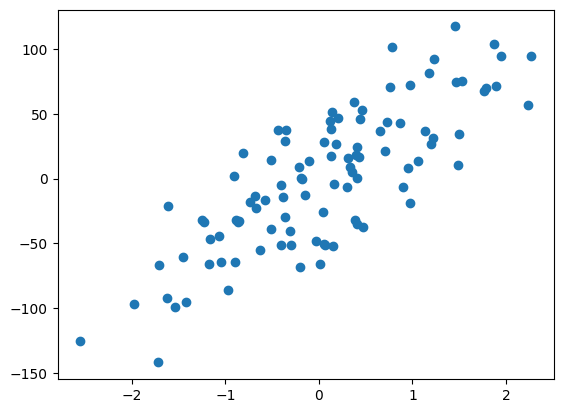

In [3]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=30,random_state=0)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
plt.scatter(X,y)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
print(reg.coef_)
print(reg.intercept_)

C:\Users\yakle\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\yakle\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\yakle\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.246e+04, tolerance: 2.533e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers i

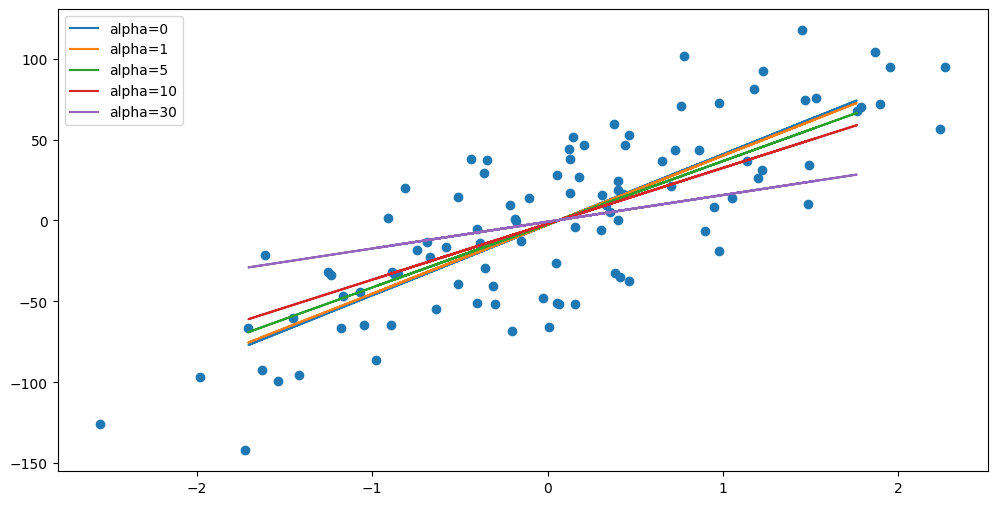

In [4]:
alphas=[0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    L=Lasso(alpha=i)
    L.fit(x_train,y_train)
    plt.plot(x_test,L.predict(x_test),label='alpha={}'.format(i))
plt.legend()
plt.show()

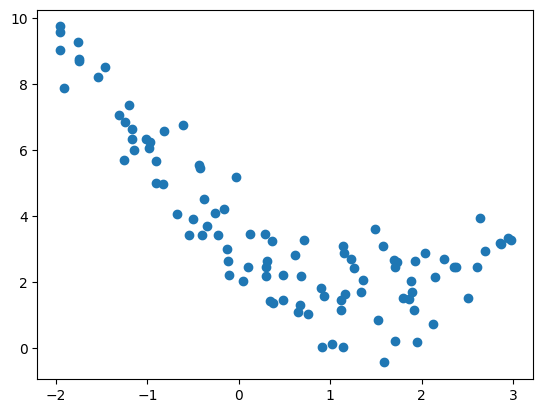

In [5]:
m=100
x1=5*np.random.rand(m,1)-2
x2=0.7*x1**2-2*x1+3+np.random.randn(m,1)
plt.scatter(x1,x2)
plt.show()

C:\Users\yakle\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\yakle\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\yakle\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.701e+01, tolerance: 5.842e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers i

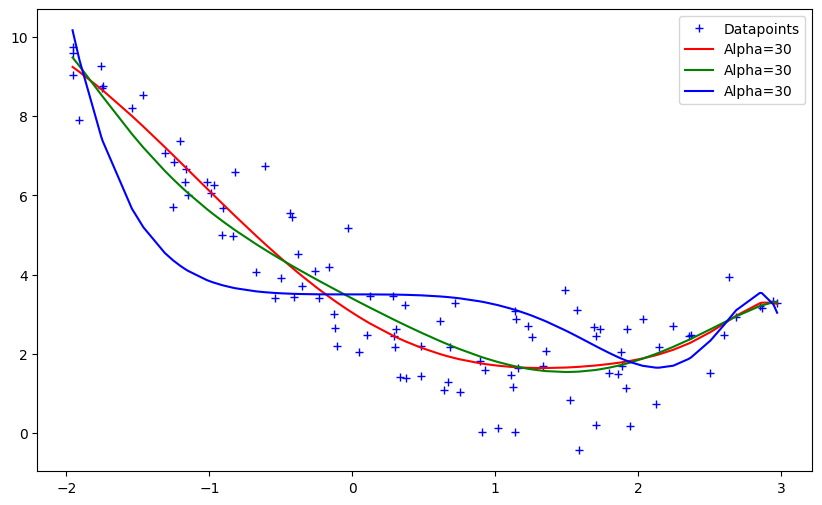

In [6]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def get_pred_lasso(x1,x2,alpha):
    model=Pipeline([
        ('poly_feats',PolynomialFeatures(degree=16)),
        ('lasso',Lasso(alpha=alpha))
    ])
    model.fit(x1,x2)
    return model.predict(x1)
alphas=[0,0.1,1]
cs=['r','g','b']
plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label='Datapoints')
for alpha,c in zip(alphas,cs):
    preds=get_pred_lasso(x1,x2,alpha)
    #plot
    plt.plot(sorted(x1[:,0]),preds[np.argsort(x1[:,0])],c,label='Alpha={}'.format(i))
plt.legend()
plt.show()